In [1]:
from src import download_kaggle, DataPreprocessor, MLModel, EvaluateModel

2022-04-27 11:47:09.061912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 11:47:09.061938: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
cfg = download_kaggle()
print(cfg)

2022-04-27 11:47:13,673 (WARNING): Running DVC command: 'dvc run -n download_kaggle ...'
NodeConfig(params={'dataset': 'datamunge/sign-language-mnist'}, outs=PosixPath('dataset'), outs_no_cache=None, outs_persist=None, outs_persist_no_cache=None, metrics=None, metrics_no_cache=None, deps=None, plots=None, plots_no_cache=None)


In [3]:
train_data = DataPreprocessor(data=cfg.outs, dataset="sign_mnist_train")
train_data.write_graph()

2022-04-27 11:47:16,915 (WARNING): Running DVC command: 'dvc run -n DataPreprocessor ...'


In [4]:
ml_model = MLModel(train_data=train_data, epochs=10, filters=[4], dense=[4])
ml_model.write_graph()

2022-04-27 11:47:20,216 (WARNING): Running DVC command: 'dvc run -n MLModel ...'


In [5]:
test_data = DataPreprocessor(data=cfg.outs, dataset="sign_mnist_test", name="test_data")
test_data.write_graph()

2022-04-27 11:47:22,924 (WARNING): Running DVC command: 'dvc run -n test_data ...'


In [6]:
EvaluateModel(ml_model=ml_model @ "model", test_data=test_data).write_graph()

2022-04-27 11:47:26,208 (WARNING): Running DVC command: 'dvc run -n EvaluateModel ...'
2022-04-27 11:47:29,625 (WARNING): Running DVC command: 'dvc plots modify nodes/EvaluateModel/confusion_matrix.csv ...'


In [7]:
!dvc dag

               +-----------------+              
               | download_kaggle |              
               +-----------------+              
                ***            ***              
              **                  ***           
            **                       **         
+------------------+                   **       
| DataPreprocessor |                    *       
+------------------+                    *       
          *                             *       
          *                             *       
          *                             *       
    +---------+                  +-----------+  
    | MLModel |                  | test_data |  
    +---------+*                 +-----------+  
                ***            ***              
                   **        **                 
                     **    **                   
                +---------------+               
                | EvaluateModel |               
                +---

# Post Processing
The following is done after calling `dvc repro`

In [8]:
ev = EvaluateModel.load()

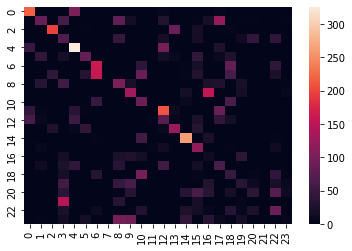

In [9]:
ev.plot_confusion_matrix()

In [10]:
DataPreprocessor["test_data"].features.shape

(7172, 28, 28, 1)

In [11]:
DataPreprocessor.load().features.shape

(27455, 28, 28, 1)

In [12]:
ml_model = MLModel.load()
print(ml_model)

<src.train.MLModel object at 0x14f49603d700>(name=MLModel)


In [13]:
print(ml_model.model.summary())

2022-04-27 11:47:37.239035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 11:47:37.239121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-27 11:47:37.239169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-27 11:47:37.240612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-04-27 11:47:37.240666: W tensorflow/stream_executor/platform/default/dso_loader

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 25)                125       
                                                             